In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import MinMaxScaler
from GA import Genetic_Algorithm
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

data = pd.read_csv("Automobile_data.csv")
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [94]:
#EDA робив за прикладом з цього посилання https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [95]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [96]:
data.duplicated().sum()

0

In [97]:
data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [98]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [99]:
#не знаю як знайти всі стовпці у яких є ?, чи як взагалі це перевірити
#тому перевірив тільки ті стовпці, що вважав важливими
data['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [100]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [101]:
data['price'].value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [102]:
data['bore'].value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64

In [103]:
data['stroke'].value_counts()

3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.11     6
3.27     6
3.41     6
3.07     6
3.58     6
3.19     6
3.5      6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
?        4
3.9      3
2.9      3
3.1      2
4.17     2
2.8      2
2.19     2
3.08     2
2.68     2
2.36     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [104]:
data['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

In [105]:
data['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
4500     7
5800     7
4200     5
4150     5
4750     4
4350     4
5100     3
4250     3
5900     3
4400     3
?        2
6600     2
4650     1
5600     1
5750     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [106]:
#видаляю рядки з невідомими числовими значеннями, не знаю як це в один рядок зробити нормально
cleared_data = data[data['price']!='?']
cleared_data = cleared_data[cleared_data['normalized-losses']!='?']
cleared_data = cleared_data[cleared_data['bore']!='?']
cleared_data = cleared_data[cleared_data['stroke']!='?']
cleared_data = cleared_data[cleared_data['horsepower']!='?']
cleared_data = cleared_data[cleared_data['peak-rpm']!='?']

cleared_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [107]:
cleared_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [108]:
#перетворюю тип числових стовпчиків з об'єктів на числові типи
cleared_data = cleared_data.apply(pd.to_numeric, errors='ignore')
cleared_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [109]:
#відповідає таблиці, 16 числових типів та 10 типу object
cleared_data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [112]:
#розділяю дані на категоріальні та числові
feature_numerical_data = cleared_data.select_dtypes(exclude='object')
feature_numerical_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [113]:
feature_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    int64  
 2   wheel-base         160 non-null    float64
 3   length             160 non-null    float64
 4   width              160 non-null    float64
 5   height             160 non-null    float64
 6   curb-weight        160 non-null    int64  
 7   engine-size        160 non-null    int64  
 8   bore               160 non-null    float64
 9   stroke             160 non-null    float64
 10  compression-ratio  160 non-null    float64
 11  horsepower         160 non-null    int64  
 12  peak-rpm           160 non-null    int64  
 13  city-mpg           160 non-null    int64  
 14  highway-mpg        160 non-null    int64  
 15  price              160 non-null    int64  
dtypes: float64(7), int64(9)
me

In [114]:
feature_categorial_data = cleared_data.select_dtypes(include='object')
feature_categorial_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
6,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
8,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
10,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [115]:
#Проаналізуйте надані дані, використовуючи методи з прикладу та документації, та зберіть результати аналізу 
#у результуючий ранжируваний датафрейм, в якому лівим індексом будуть ознаки, 
#а колонки – результати однофакторного аналізу ознак. 
#Подумайте над системою ранжування такою, яка б враховувала наявність багатьох факторів ранжування 
#(припустимо, що всі вони мають однакову вагу на прийняття вами рішення).

#я не знаю, як це нормально реалізувати. що таке "однофакторний аналіз ознак"
#feature(ознаки) буду робити по цьому посиланню з лаби - https://scikit-learn.org/stable/modules/feature_selection.html
#перший метод, а що робити з результатами - не знаю)0))

#!зверху старий коментар, але най буде!

sel = VarianceThreshold(0.5)
sel.fit(feature_numerical_data)
#повертає дані без назви стовпців
variancethreshold_data = sel.transform(feature_numerical_data)
variancethreshold_data

array([[ 2.0000e+00,  1.6400e+02,  9.9800e+01, ...,  2.4000e+01,
         3.0000e+01,  1.3950e+04],
       [ 2.0000e+00,  1.6400e+02,  9.9400e+01, ...,  1.8000e+01,
         2.2000e+01,  1.7450e+04],
       [ 1.0000e+00,  1.5800e+02,  1.0580e+02, ...,  1.9000e+01,
         2.5000e+01,  1.7710e+04],
       ...,
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  1.8000e+01,
         2.3000e+01,  2.1485e+04],
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  2.6000e+01,
         2.7000e+01,  2.2470e+04],
       [-1.0000e+00,  9.5000e+01,  1.0910e+02, ...,  1.9000e+01,
         2.5000e+01,  2.2625e+04]])

In [116]:
sel = VarianceThreshold(0.5)
sel.fit(feature_numerical_data)

variancethreshold_data = feature_numerical_data[feature_numerical_data.columns[sel.get_support(indices=True)]]
variancethreshold_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,18,22,17450
6,1,158,105.8,192.7,71.4,55.7,2844,136,8.5,110,5500,19,25,17710
8,1,158,105.8,192.7,71.4,55.9,3086,131,8.3,140,5500,17,20,23875
10,2,192,101.2,176.8,64.8,54.3,2395,108,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,23.0,106,4800,26,27,22470


In [117]:
sel.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [118]:
#відсіяло bore та stroke
#наскільки я розумію, то в таблицю мені необхідно буде вписувати одиниці там, де залишились стовпці
#а нулі - де видалені
#а як це автоматизувати чи навіть вручну зробити
variancethreshold_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 3 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          160 non-null    int64  
 1   normalized-losses  160 non-null    int64  
 2   wheel-base         160 non-null    float64
 3   length             160 non-null    float64
 4   width              160 non-null    float64
 5   height             160 non-null    float64
 6   curb-weight        160 non-null    int64  
 7   engine-size        160 non-null    int64  
 8   compression-ratio  160 non-null    float64
 9   horsepower         160 non-null    int64  
 10  peak-rpm           160 non-null    int64  
 11  city-mpg           160 non-null    int64  
 12  highway-mpg        160 non-null    int64  
 13  price              160 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 18.8 KB


In [119]:
columns_numerical = feature_numerical_data.columns
sel = VarianceThreshold(0.5)
selected_data = sel.fit_transform(feature_numerical_data.drop(["price"], axis=1), feature_numerical_data["price"])
selected_features = sel.get_feature_names_out(columns_numerical[:len(columns_numerical) - 1])
display(pd.DataFrame(selected_features))
display(pd.DataFrame(selected_data, columns=selected_features))

,0
0,symboling
1,normalized-losses
2,wheel-base
3,length
4,width
5,height
6,curb-weight
7,engine-size
8,compression-ratio
9,horsepower


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,10.0,102.0,5500.0,24.0,30.0
1,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,8.0,115.0,5500.0,18.0,22.0
2,1.0,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,8.5,110.0,5500.0,19.0,25.0
3,1.0,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,8.3,140.0,5500.0,17.0,20.0
4,2.0,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,8.8,101.0,5800.0,23.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,9.5,114.0,5400.0,23.0,28.0
156,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,8.7,160.0,5300.0,19.0,25.0
157,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,8.8,134.0,5500.0,18.0,23.0
158,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,23.0,106.0,4800.0,26.0,27.0


In [120]:
kbest_sel=SelectKBest(chi2, k=3)
#не працює з від'ємними значеннями symboling
#selected_data_kbest = kbest_sel.fit_transform(feature_numerical_data.drop(["price"], axis=1),feature_numerical_data["price"])

feature_numerical_data_normalized_symboling = feature_numerical_data
feature_numerical_data_normalized_symboling['symboling'] = MinMaxScaler().fit_transform(feature_numerical_data_normalized_symboling['symboling'].values.reshape((-1, 1)))
selected_data_kbest = kbest_sel.fit_transform(feature_numerical_data_normalized_symboling.drop(["price"], axis=1),feature_numerical_data_normalized_symboling["price"])
selected_features = kbest_sel.get_feature_names_out(columns_numerical[:len(columns_numerical) - 1])
display(pd.DataFrame(selected_data_kbest, columns=selected_features))

,normalized-losses,curb-weight,peak-rpm
0,164.0,2337.0,5500.0
1,164.0,2824.0,5500.0
2,158.0,2844.0,5500.0
3,158.0,3086.0,5500.0
4,192.0,2395.0,5800.0
...,...,...,...
155,95.0,2952.0,5400.0
156,95.0,3049.0,5300.0
157,95.0,3012.0,5500.0
158,95.0,3217.0,4800.0


In [121]:
#метод f_classif за замовчуванням
percentile_sel=SelectPercentile(percentile=20)

selected_data_percentile = percentile_sel.fit_transform(feature_numerical_data_normalized_symboling.drop(["price"], axis=1),feature_numerical_data_normalized_symboling["price"])
selected_features = percentile_sel.get_feature_names_out(columns_numerical[:len(columns_numerical) - 1])
display(pd.DataFrame(selected_data_percentile, columns=selected_features))

,curb-weight,engine-size,horsepower
0,2337.0,109.0,102.0
1,2824.0,136.0,115.0
2,2844.0,136.0,110.0
3,3086.0,131.0,140.0
4,2395.0,108.0,101.0
...,...,...,...
155,2952.0,141.0,114.0
156,3049.0,141.0,160.0
157,3012.0,173.0,134.0
158,3217.0,145.0,106.0


In [134]:
#помилка з індексами
'''clf = ExtraTreesRegressor(n_estimators=25)
ga_sel = Genetic_Algorithm(loss_func = mean_squared_error, estimator = clf, 
                             n_gen = 10, n_pop = 20, algorithm = 'NSGA2')
ga_sel.fit(X_train = feature_numerical_data_normalized_symboling.drop(["price"], axis=1), y_train = feature_numerical_data_normalized_symboling["price"], cv = 5)
selected_data_ga = ga_sel.transform(feature_numerical_data_normalized_symboling.drop(["price"], axis=1))'''


InvalidIndexError: (slice(None, None, None), [False, False, False, False, True, True, True, False, False, False, True, True, True, True, True])

In [123]:
clf = Lasso(normalize=True, alpha = 0.001)
clf.fit(feature_numerical_data_normalized_symboling.drop(["price"], axis=1),feature_numerical_data_normalized_symboling["price"])
np.round(clf.coef_ ,3)

e:\пп, 4 курс, 1 семестр\dsml_course\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


array([ 3.990110e+02,  7.137000e+00,  1.978580e+02, -9.248900e+01,
        7.671600e+02,  3.894600e+01,  5.092000e+00,  4.992400e+01,
       -1.813309e+03, -1.839726e+03,  1.040650e+02,  2.609900e+01,
        7.540000e-01,  1.895800e+01, -1.340900e+01])

In [131]:
#не знаю, що робити з цими данними та як правильно ассерт застосувати
'''lasso_sel = SelectFromModel(clf, prefit=True, threshold=1e-5)
selected_data_lasso = lasso_sel.transform(feature_numerical_data_normalized_symboling.drop(["price"], axis=1))
x = feature_numerical_data_normalized_symboling.drop(["price"],axis=1)
assert np.array_equal(selected_data_lasso,x[:].squeeze()) '''

e:\пп, 4 курс, 1 семестр\dsml_course\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [132]:
cleared_data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518388,-0.520465,-0.336217,-0.219850,-0.473994,-0.252372,-0.110238,-0.257013,-0.020539,-0.139022,-0.003669,0.199798,0.088912,0.149309,-0.163329
normalized-losses,0.518388,1.000000,-0.064001,0.029114,0.104857,-0.417081,0.122860,0.203841,-0.036167,0.065627,-0.129971,0.290906,0.240676,-0.236934,-0.189691,0.199924
wheel-base,-0.520465,-0.064001,1.000000,0.871968,0.815935,0.558764,0.810507,0.650488,0.580484,0.164012,0.293968,0.514507,-0.292491,-0.576635,-0.608270,0.734789
length,-0.336217,0.029114,0.871968,1.000000,0.839184,0.505156,0.870355,0.726666,0.649059,0.116049,0.188968,0.666726,-0.239104,-0.716877,-0.717831,0.760323
width,-0.219850,0.104857,0.815935,0.839184,1.000000,0.298403,0.870649,0.780018,0.575048,0.192891,0.261530,0.678779,-0.235906,-0.662123,-0.689367,0.843316
height,-0.473994,-0.417081,0.558764,0.505156,0.298403,1.000000,0.369363,0.116505,0.261501,-0.095364,0.237432,0.032264,-0.251236,-0.194559,-0.221646,0.247500
curb-weight,-0.252372,0.122860,0.810507,0.870355,0.870649,0.369363,1.000000,0.888847,0.646640,0.171691,0.226513,0.788509,-0.262086,-0.759538,-0.787167,0.893810
engine-size,-0.110238,0.203841,0.650488,0.726666,0.780018,0.116505,0.888847,1.000000,0.597336,0.296693,0.143568,0.809855,-0.287260,-0.695890,-0.711364,0.841725
bore,-0.257013,-0.036167,0.580484,0.649059,0.575048,0.261501,0.646640,0.597336,1.000000,-0.105464,0.019216,0.557107,-0.315841,-0.585618,-0.586729,0.534891
stroke,-0.020539,0.065627,0.164012,0.116049,0.192891,-0.095364,0.171691,0.296693,-0.105464,1.000000,0.240895,0.149315,-0.008569,-0.021381,-0.013974,0.158798


<AxesSubplot:>

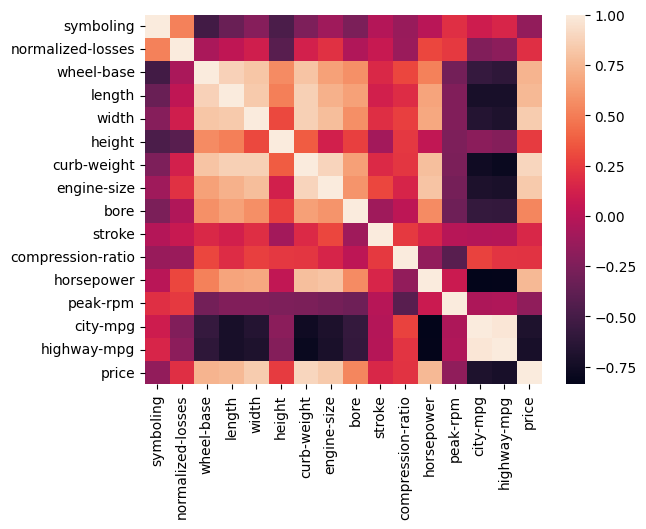

In [133]:
sns.heatmap(cleared_data.corr())

In [ ]:
#я не знаю, що таке continious data та чи є цей датасет continious
#тому я не знаю, чи можна використати взагалі інші методи роботи з числовими ознаками з файлу прикладу
#якщо ж можна, то як їх використовувати)0)))))))))))))))))))))))))))
#так само як працювати з категоріальними методами, я передивився весь файл
#що таке target вектор, що означає інший вектор для цих методів
#чи є в цьому датасеті target взагалі, як його/їх знаходити, якщо вони є, що з ними робити, як знаходити інший вектор, як опрацьовувати результати цих методів
#яка різниця між https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html датасетом
#звідси й тим, що в нас
#як застосовувати ці методи до нашого датасету
#все ще питання, що ж таке "результати однофакторного аналізу ознак" саме у завданні та як його виконати
#як взагалі використовувати ці методи з цим датасетом
#що значит система ранжування та як її реалізувати

#попросити показати приклади роботи цих методів з нашим датасетом, бо я не розумію ні теорію для їх використання(питання вище)
#ні практику їх застосування до цих методів, та чи можна взагалі їх застосувати
#(я вже розділив на категоріальні(або я так думаю, бо я не знаю що це) та чисельні дані)

#як їх потім об'єднати нормально в один датафрейм, бо я навіть не знаю, який результат у нас повертають ці методи
#я не знаю, що робити з результатами variancethreshold і як їх потім додати у датафрейм

#що значить Примітка. Кілька атрибутів у базі даних можна використовувати як атрибут «класу».

#продивися це посилання https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
#що ми можемо обрати y, symboling? чому про це немає інформації у лабораторній

#чому в лабораторних взагалі немає прикладів використання будь-чого підлаштованих під завдання лабораторної?
#я досі не розумію нащо нам так багато бібліотек, якщо не вказується що ми маємо використовувати з них

#я передевився всі посилання до лабораторної
#я не маю уявлення, як їх використати до даних з цієї лабораторної(що використовувати як х, що як у)
#а бажання перечитувати тонни теорії, написаної не для людей ще й без необхідних знань для цього, привіт лекціям та їх якості,
#а також відсутності лекційного матеріалу. ще добре, коли у лабораторній є АГРЕГРОВАНИЙ теоретичний матеріал, що відноситься 
#до завдання